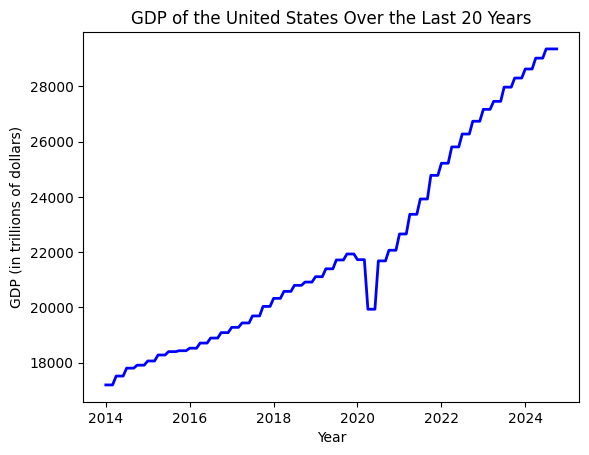

In [ ]:
!pip install reportlab
# And Import other necessary modules too
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from reportlab.pdfgen import canvas
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib import colors

# Define observation period
observation_start = "2014-01-01"
#observation_end = "2024-01-01"
observation_end = (datetime.now().replace(day=1) + relativedelta(months=1) - relativedelta(days=1)).strftime("%Y-%m-%d")

# Get data from FRED
data = pdr.DataReader(["GDP", "UNRATE"], "fred", observation_start, observation_end)

# Add a Year column
data['Year'] = data.index.strftime('%Y')

# Fill NaN values by forward-filling within each quarter
data['GDP'] = data['GDP'].ffill()

# Create tables of data
gdp_table = data[["Year", "GDP"]].set_index("Year").round(2)
unemployment_table = data[["Year", "UNRATE"]].set_index("Year").round(2)

# Plot GDP data
plt.plot(data.index, data["GDP"], color="blue", linewidth=2)
plt.xlabel("Year")
plt.ylabel("GDP (in trillions of dollars)")
plt.title("GDP of the United States Over the Last 20 Years")

# Save the chart
gdp_chart = "gdp_chart.png"
plt.savefig(gdp_chart)
plt.show()  # Show the plot to verify


# Create a new PDF document
doc = canvas.Canvas("us_economy.pdf")

# Add a title to the document
doc.setTitle("US Economy Over the Last 20 Years")

# Add text to the document
doc.setFont("Helvetica", 24)
doc.drawString(100, 750, "US Economy Over the Last 20 Years")

# Add tables to the document
doc.setFont("Helvetica", 12)
doc.drawString(100, 700, "GDP (in trillions of dollars)")
doc.drawString(100, 680, "Unemployment Rate")

# Use Pandas to create tables of data
gdp_table.to_string()

unemployment_table.to_string()

# Add charts to the document
doc.drawImage(gdp_chart, 100, 500, width=400, height=200)

# Save the PDF document
doc.save()


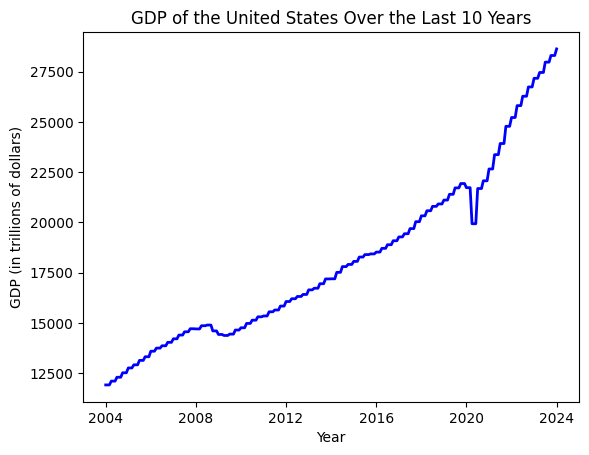

           GDP
Year          
2004  11923.45
2004  11923.45
2004  11923.45
2004  12112.82
2004  12112.82
...        ...
2023  27967.70
2023  28296.97
2023  28296.97
2023  28296.97
2024  28624.07

[241 rows x 1 columns]


In [ ]:
!pip install reportlab
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import pandas as pd

# Define observation period
observation_start = "2004-01-01"
observation_end = "2024-01-01"

# Get data from FRED
data = pdr.DataReader(["GDP", "UNRATE"], "fred", observation_start, observation_end)

# Add a Year column
data['Year'] = data.index.strftime('%Y')

# Fill NaN values by forward-filling within each quarter
data['GDP'] = data['GDP'].ffill()

# Create tables of data
gdp_table = data[["Year", "GDP"]].set_index("Year").round(2)
unemployment_table = data[["Year", "UNRATE"]].set_index("Year").round(2)

# Plot GDP data
plt.plot(data.index, data["GDP"], color="blue", linewidth=2)
plt.xlabel("Year")
plt.ylabel("GDP (in trillions of dollars)")
plt.title("GDP of the United States Over the Last 20 Years")

# Save the chart
gdp_chart = "gdp_chart.png"
plt.savefig(gdp_chart)
plt.show()  # Show the plot to verify

print(gdp_table)

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle

# Define observation period
observation_start = "2014-01-01"
observation_end = (datetime.now().replace(day=1) + relativedelta(months=1) - relativedelta(days=1)).strftime("%Y-%m-%d")

# Get data from FRED
data = pdr.DataReader(["GDP", "UNRATE"], "fred", observation_start, observation_end)

# Add a Year column and forward-fill GDP values for each quarter
data['Year'] = data.index.strftime('%Y')
data['GDP'] = data['GDP'].ffill()

# Create tables of data
gdp_table = data[["Year", "GDP"]].set_index("Year").round(2)

# Reshape unemployment data to show Year as rows and Month as columns in order
unemployment_data = data[['UNRATE']].copy()
unemployment_data['Year'] = data.index.year
unemployment_data['Month'] = data.index.strftime('%b')
unemployment_table = unemployment_data.pivot(index='Year', columns='Month', values='UNRATE').round(2)

# Reorder columns to ensure they go from Jan to Dec
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
unemployment_table = unemployment_table.reindex(columns=month_order)

# Plot GDP data
plt.plot(data.index, data["GDP"], color="blue", linewidth=2)
plt.xlabel("Year")
plt.ylabel("GDP (in trillions of dollars)")
plt.title("GDP of the United States Over the Last 20 Years")

# Save the chart
gdp_chart = "gdp_chart.png"
plt.savefig(gdp_chart)
plt.close()

# Create a new PDF document
doc = canvas.Canvas("us_economy.pdf", pagesize=letter)
width, height = letter

# Add a title to the document
doc.setTitle("US Economy Over the Last 20 Years")
doc.setFont("Helvetica", 24)
doc.drawString(100, height - 50, "US Economy Over the Last 20 Years")

# Add the GDP chart image
doc.drawImage(gdp_chart, 100, height - 300, width=400, height=200)

# Add Unemployment Rate Table
doc.setFont("Helvetica", 12)
doc.drawString(100, height - 320, "Unemployment Rate by Year and Month")

# Convert unemployment_table DataFrame to a list of lists for ReportLab Table
table_data = [["Year"] + month_order]  # Add month headers
table_data += unemployment_table.reset_index().values.tolist()  # Add year and values

# Set column widths to fit the table within the page
col_widths = [40] + [30] * 12  # 40 for "Year" and 30 for each month

# Create and style the table
table = Table(table_data, colWidths=col_widths)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTSIZE', (0, 0), (-1, -1), 8),
]))

# Position the table below the chart
table.wrapOn(doc, width, height)
table.drawOn(doc, 50, height - 550)  # Adjust x-coordinate to 50 for more room on the left

# Save the PDF document
doc.save()


table_data += [[int(row[0])] + row[1:] for row in unemployment_table.reset_index().values.tolist()]